In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from plot_diff_si import * 


# Si

In [5]:
si_data= pd.read_csv("si_qmc_dens_vxc.csv",index_col=0)

In [6]:
newdens_QMC = si_data["density_qmc"].to_numpy()
vxc_qmc=si_data["vxc_qmc"].to_numpy()
newerbar_QMC = si_data["erbar_qmc"].to_numpy()
erbar= get_dens_inSD_si(newerbar_QMC)

## Analyse

In [65]:
def get_data_from_npz(npz_file, get_vars=1,it=-1): 
    hold= np.load(npz_file)
    num_iter=len(hold["dens_history"])
    dens=hold["dens_history"][it]
    vxc=hold["potxc_history"][it]
    bands=hold["bands_history"][it]
    residu= hold["diff_l"].real
    direct_gap=(bands[0,4]-bands[0,3]) * 27.211
    gap=np.min( np.abs(bands[:,4]-bands[0,3]) ) * 27.211
    print("============")
    print("number of iterations is ", num_iter)
    print("diff on density for the last iteration: {:.2e}".format(residu[it]))
    print("The direct gap is {:.4f} ev | QMC = 2.72 ev".format(direct_gap))
    #print("The gap is {:.4f} for this k-grid ev| QMC = 0.82 ev".format(gap))    
    print("============")
    if get_vars:
        return dens, vxc, direct_gap, gap, residu, bands 

## Connector 

In [8]:
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/IntPrefact/si_IntPrefactorcon_consym.npz si_IntPrefactor_con_consym_v2.npz
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/si_IntPrefactor_con_consym.npz .
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/si_newPrefOldconsym_consym.npz .


- consym_IntPrefactor: $v_{\rm xc} = v^h_{\rm xc} (n^c)$ 
and $n^c= \frac{1}{\int f_{\rm xc}(n_0,{\bf r,r'} ) } \int f_{\rm xc}(n_0, {\bf r,r'} ) n({\bf r'})$ with $n_0=0.5(n({\bf r})+n({\bf r'}))$

- consym_old: $v_{\rm xc} = v^h_{\rm xc} (n^c)$ 
and $n^c= \frac{1}{f_{\rm xc}(n_0) } \int f_{\rm xc}(n'_0, {\bf r,r'} ) n({\bf r'})$ with $n_0=0.5(n({\bf r})+n^c({\bf r}))$ and $n'_0=0.5(n({\bf r})+n({\bf r'}))$

- consym_ncnrp_prefact: $v_{\rm xc} = v^h_{\rm xc} (n^c)$ 
and $n^c= \frac{1}{\int f_{\rm xc}(n_0) }  \int f_{\rm xc}(n'_0, {\bf r,r'} ) n({\bf r'})$ with $n_0=0.5(n({\bf r'})+n^c({\bf r}))$ and $n'_0=0.5(n({\bf r})+n({\bf r'}))$

- consym_ncnrp_all: $v_{\rm xc} = v^h_{\rm xc} (n^c)$ 
and $n^c= \frac{1}{\int f_{\rm xc}(n_0,{\bf r,r'} ) } \int f_{\rm xc}(n_0, {\bf r,r'} ) n({\bf r'})$ with $n_0=0.5(n^c({\bf r})+n({\bf r'}))$

connector sym with corrected prefactor
number of iterations is  79
diff on density for the last iteration: 1.76e-17
The direct gap is 2.6467 ev | QMC = 2.72 ev
connector sym old
number of iterations is  46
diff on density for the last iteration: 1.72e-17
The direct gap is 2.7129 ev | QMC = 2.72 ev
number of iterations is  6
diff on density for the last iteration: 1.39e-05
The direct gap is 2.6969 ev | QMC = 2.72 ev
number of iterations is  6
diff on density for the last iteration: 1.06e-05
The direct gap is 2.6622 ev | QMC = 2.72 ev


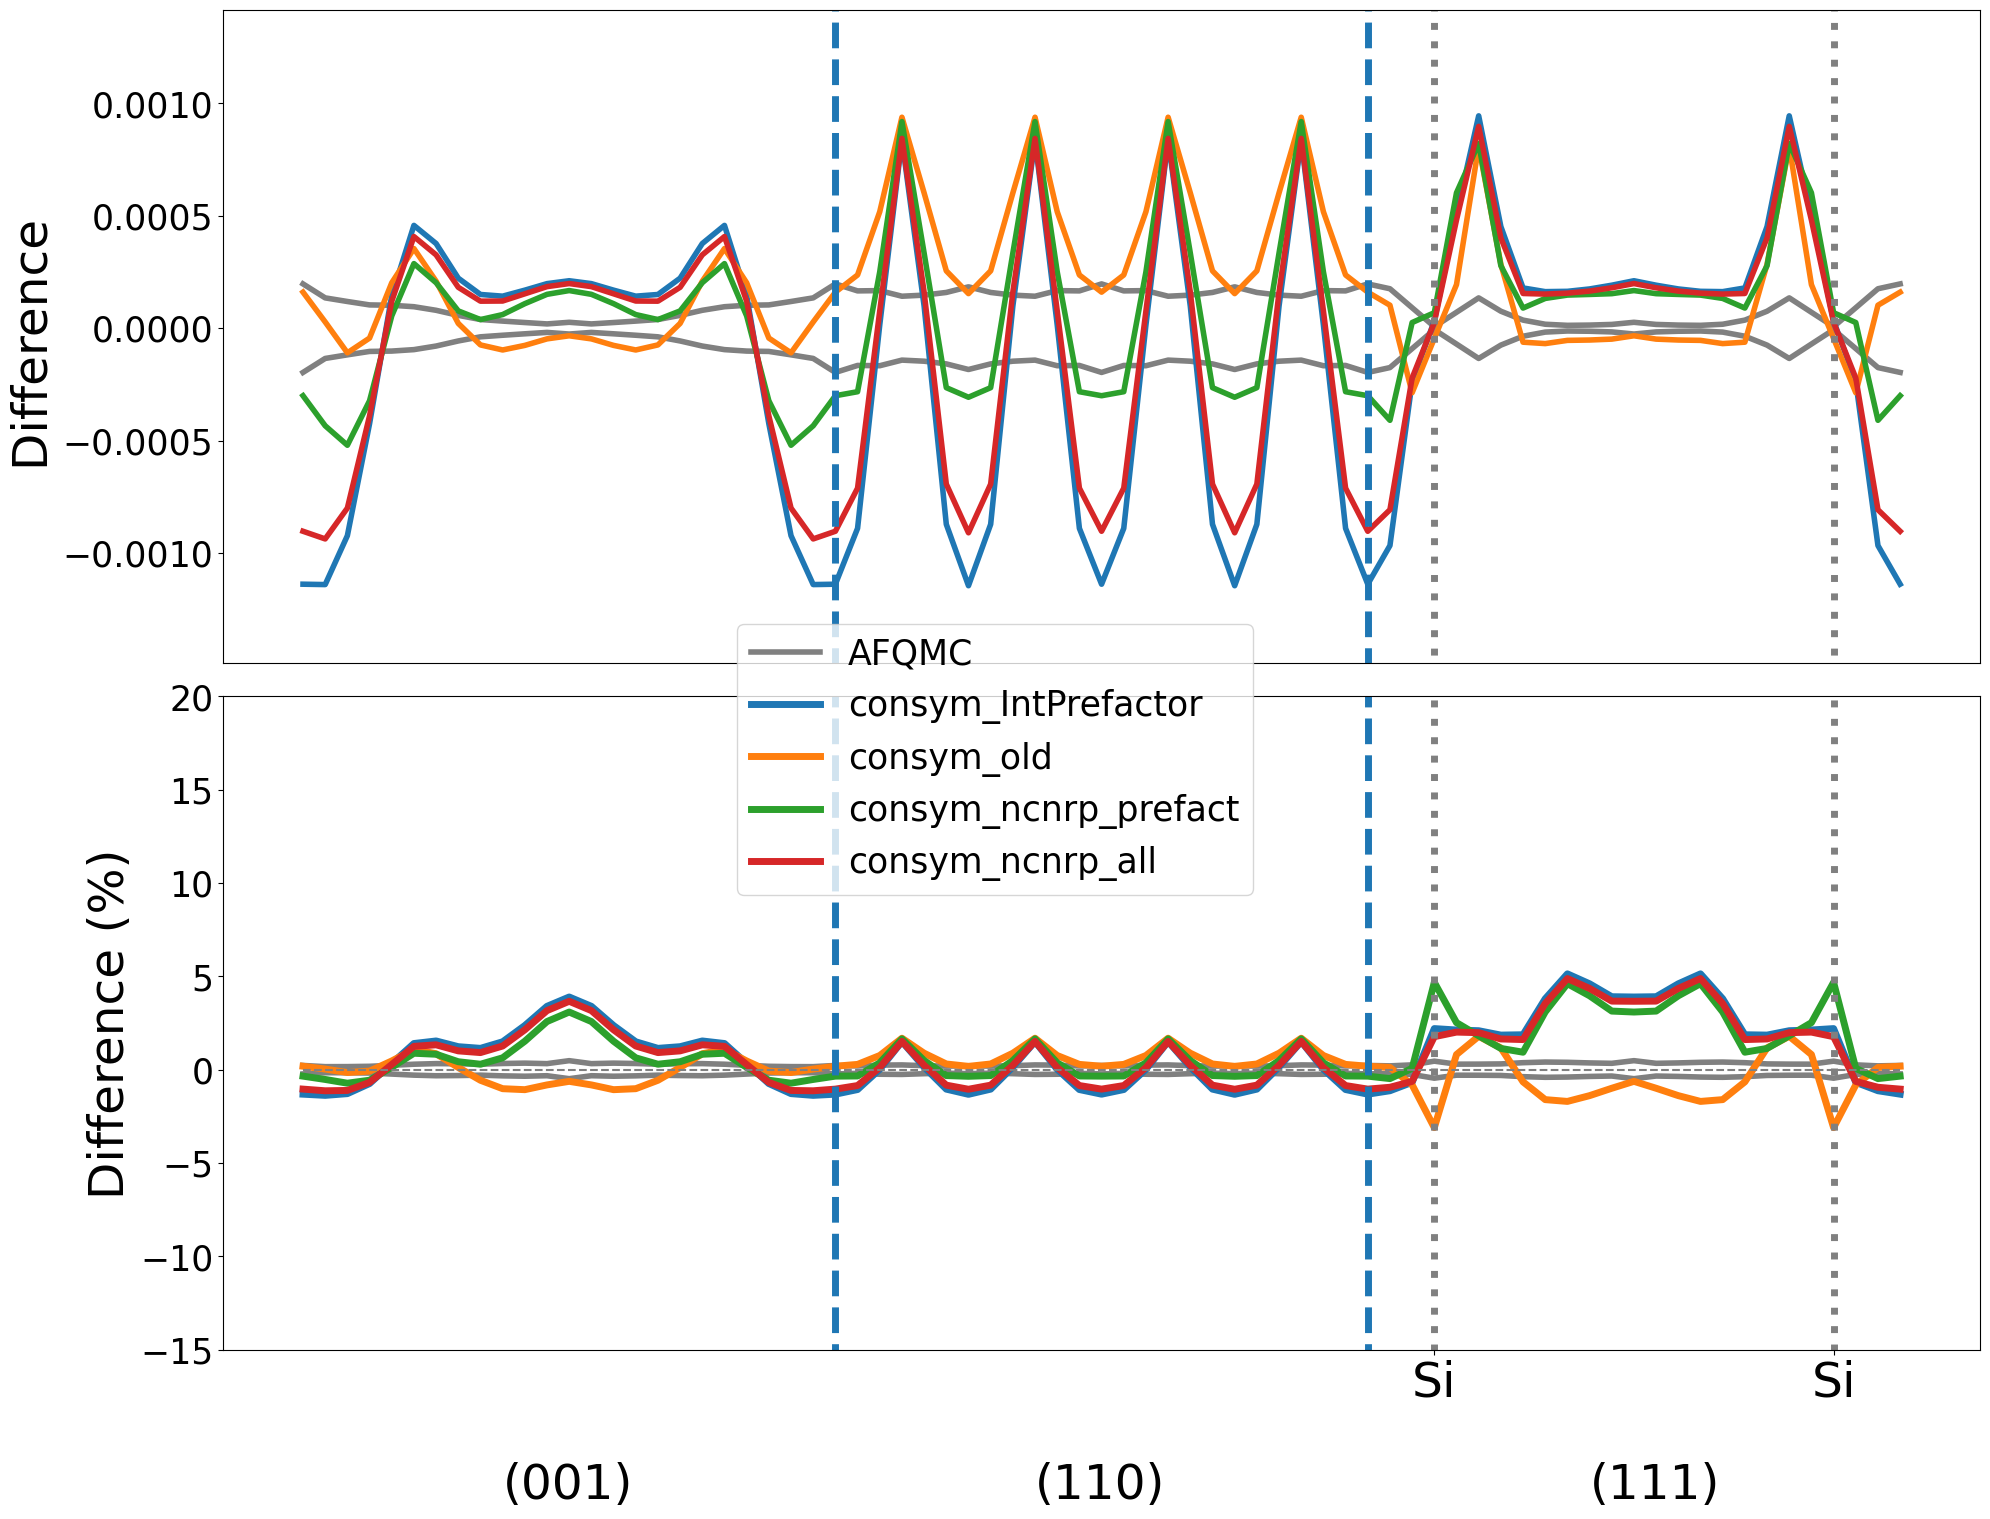

In [126]:
print("connector sym with corrected prefactor")
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym_v2.npz", it=-1)
print("connector sym old")
dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_consym_old.npz")
dens_con3,vxc_con3,_,_,_,_= get_data_from_npz("si_05nc05nrp_in_prefactcon_consym.npz")
dens_con4,vxc_con4,_,_,_,_= get_data_from_npz("si_05nc05nrp_all_con_consym.npz")
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_newPrefOldconsym_consym.npz")

diff_con1= get_dens_inSD_si(dens_con1-newdens_QMC) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_si(dens_con2)-get_dens_inSD_si(newdens_QMC) 
diff_con3= get_dens_inSD_si(dens_con3)-get_dens_inSD_si(newdens_QMC) 
diff_con4= get_dens_inSD_si(dens_con4)-get_dens_inSD_si(newdens_QMC) 


diff_approx= [diff_con1, diff_con2,diff_con3,diff_con4] 
plot_diff_func(get_dens_inSD_si(newdens_QMC), diff_approx, ["consym_IntPrefactor","consym_old","consym_ncnrp_prefact","consym_ncnrp_all"],erbar) 

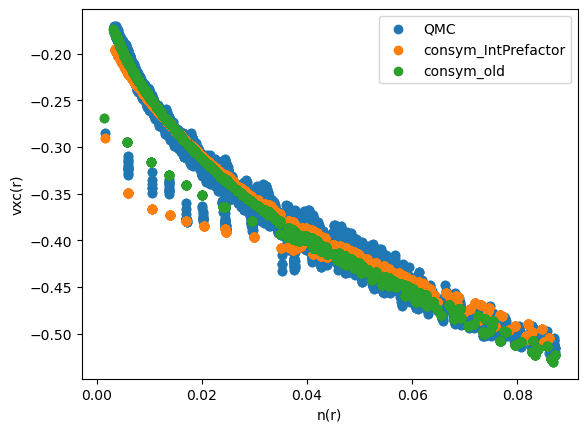

In [10]:
plt.rcdefaults()
#with plt.style.context("latex-sans"):
plt.scatter(newdens_QMC,vxc_qmc, label="QMC")
plt.scatter(dens_con1, vxc_con1, label="consym_IntPrefactor")
plt.scatter(dens_con2, vxc_con2, label="consym_old")
plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.legend()

## Linear approximation 

In [11]:
#! scp  ara:/home/me36sin/fxc_conn_article/Si/calculations/si_IntPrefactor_lin_linear_consym.npz .

- linear_sym: $v_{\rm xc} = v_{\rm xc}(n_{\rm mean})  + \int f_{\rm xc}(n_0, {\bf r,r'} ) (n({\bf r'})-n_0)$ with $n_0=0.5(n({\bf r})+n({\bf r'}))$

diff on density for the last iteration: 1.76e-17
The direct gap is 2.6467 ev | QMC = 2.72 ev
diff on density for the last iteration: 1.72e-17
The direct gap is 2.7129 ev | QMC = 2.72 ev


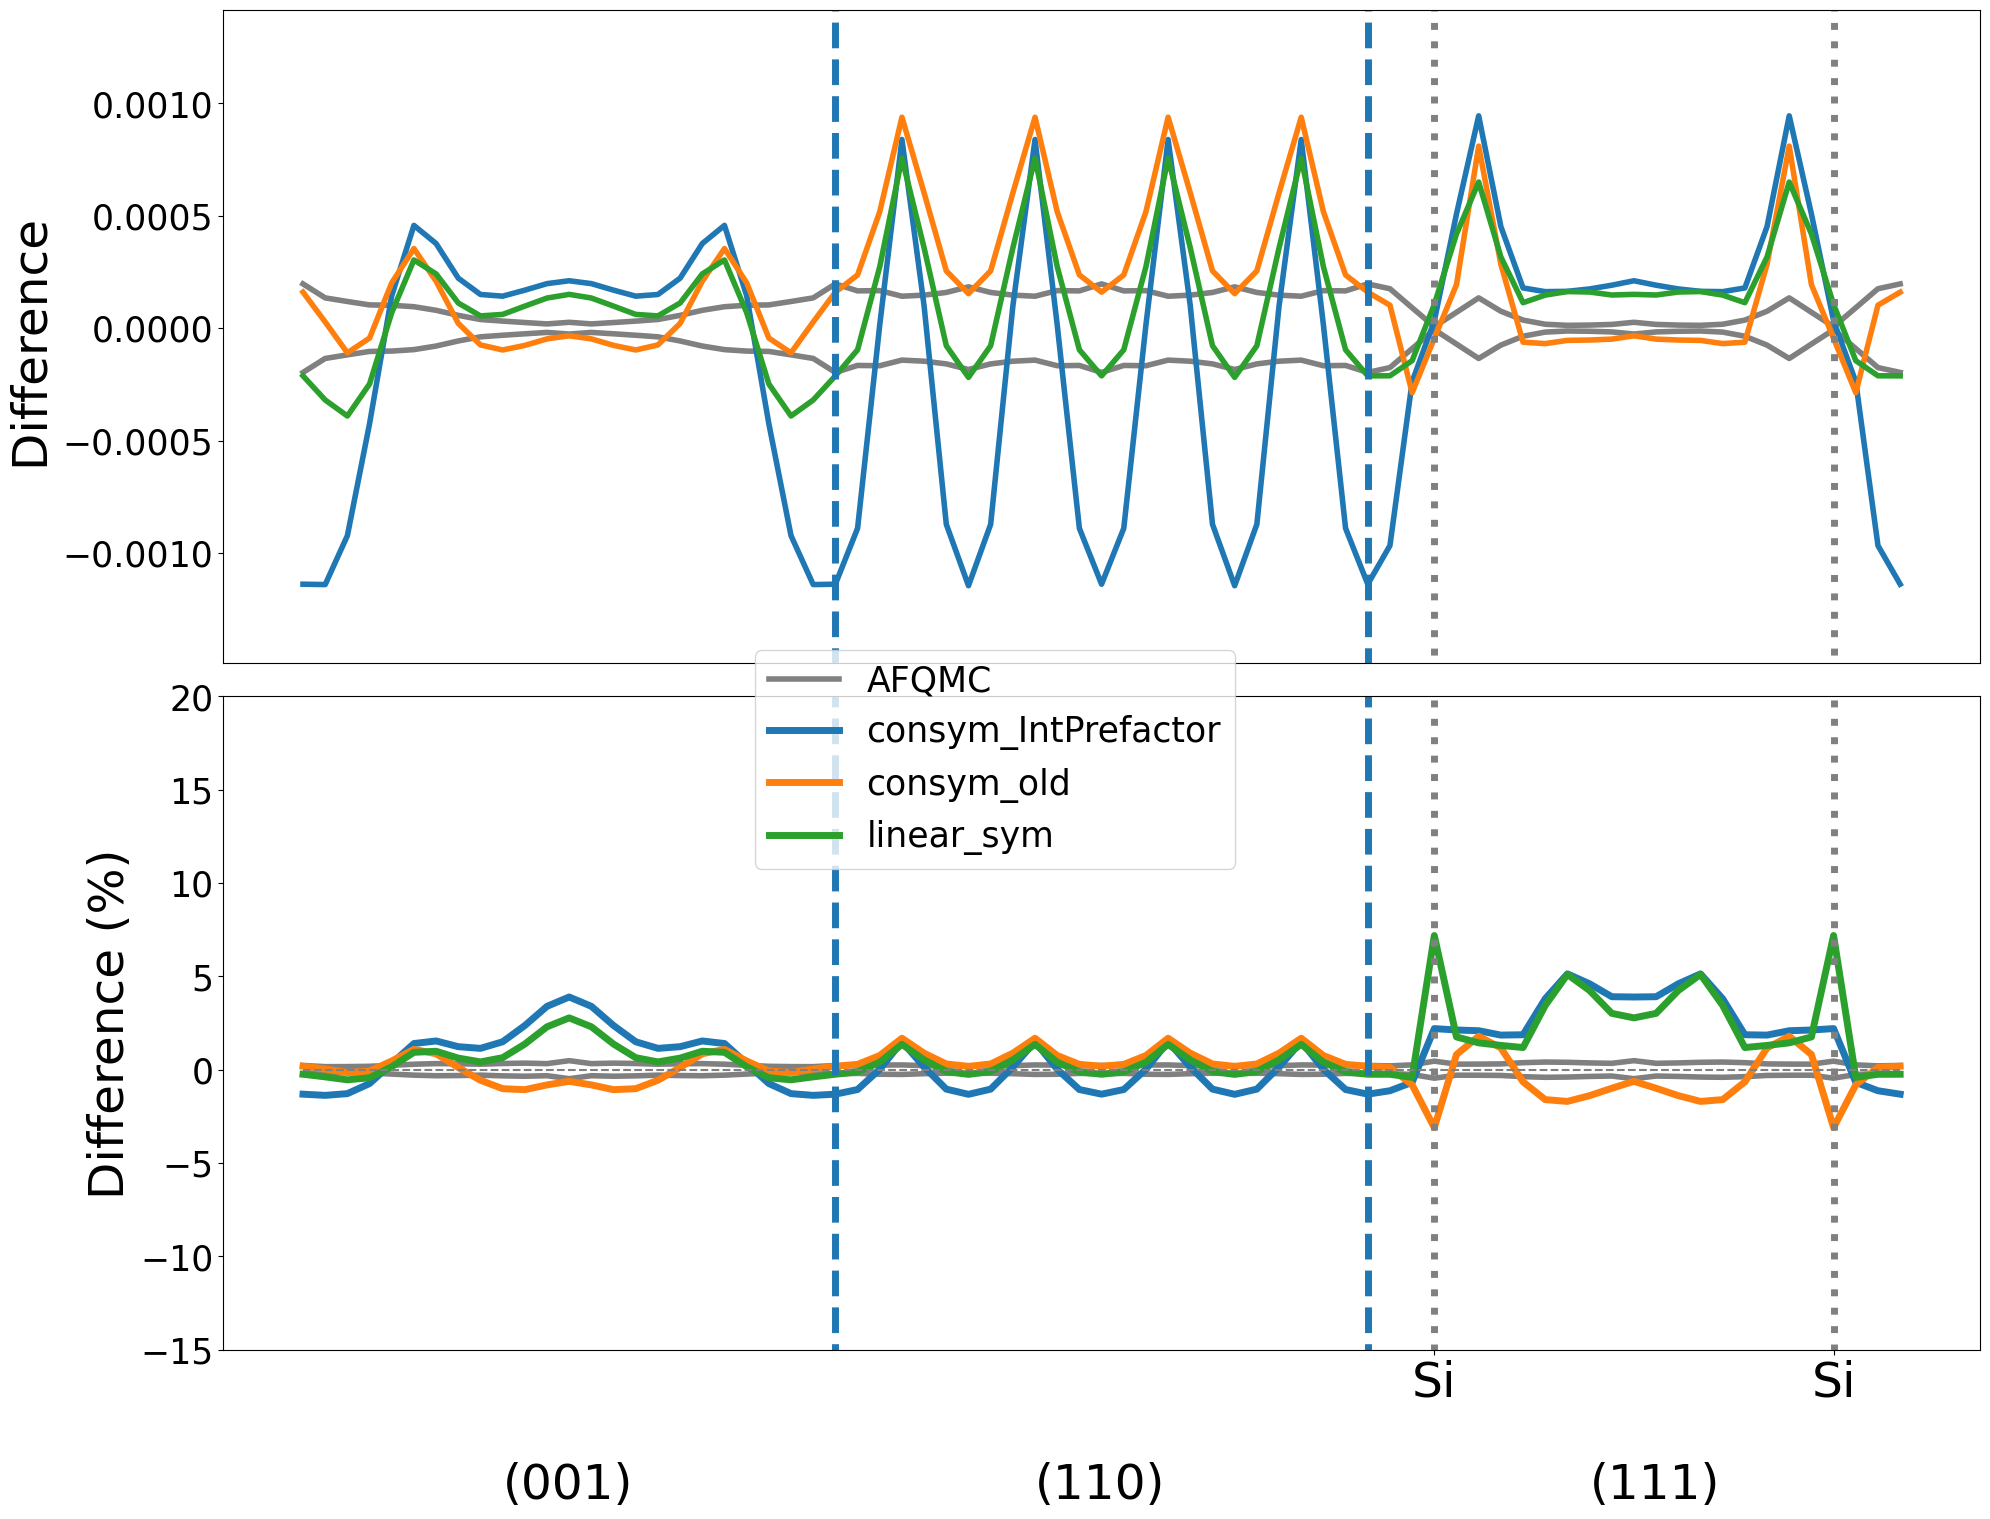

In [12]:
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym_v2.npz")
dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_consym_old.npz")
dens_con3= np.load("densLinSym_direct.npz")["densR"]

diff_con1= get_dens_inSD_si(dens_con1-newdens_QMC) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_si(dens_con2)-get_dens_inSD_si(newdens_QMC) 
diff_con3= get_dens_inSD_si(dens_con3)-get_dens_inSD_si(newdens_QMC) 

diff_approx= [diff_con1, diff_con2,diff_con3] 
plot_diff_func(get_dens_inSD_si(newdens_QMC), diff_approx, ["consym_IntPrefactor","consym_old","linear_sym"],erbar) 

In [13]:
# old LDA 
dens_LDA_old=np.load('densLDA_25ry6k.npz')["densR"]

# Vxc=vxc(mean)
densR_mean=np.load('densmean_NY.npz')["densR"]
diag_mean=get_dens_inSD_si(densR_mean)

# LDA 
dens_LDA_NY= np.genfromtxt("densLDA_25ry6k.dat")
vxc_ref_lda=np.genfromtxt("VXC_lda.dat")

# n0=n(r)
densR_LinLDA_NY=np.load('densLinLDA_NY_si.npz')["densR"]
vxc_LinLDA_NY_para=np.load('densLinLDA_si_para.npz')["potxc_history"][-1]

#n0=nmean 
densR_Linmean=np.load('densLinmean_25ry6k.npz')["densR"]
densR_Linmean_NY= densR_Linmean + dens_LDA_NY-dens_LDA_old
vxc_Linmean_NY_para=np.load('densLinMean_si_para.npz')["potxc_history"][-4]

# n0= 0.5 (nc(r) + n(r))  
densR_Lin05ncnr= np.load('densLinSym05ncnr.npz')["densR"] 
vxc_Lin05ncnr_NY_para=np.load('densLinapprox_sym05ncnr.npz')["potxc_history"][8]

# n0 = 0.5 (n(r) + n(r'))
densR_LinSym_NY=np.load('densLinSym_direct.npz')["densR"]

# n_0= 0.5 (n(r) + nmean) 
dens_linmeanlda,vxc_linmeanlda,_,_,_,_= get_data_from_npz("si_linear_meanlda.npz")

diff on density for the last iteration: 1.62e-17
The direct gap is 2.6227 ev | QMC = 2.72 ev


In [44]:
def get_diff_si(densR): 
    return get_dens_inSD_si(densR) - get_dens_inSD_si(newdens_QMC)

approx_dict_si= { "MDA": (densR_mean, None), "LDA": (dens_LDA_NY,vxc_ref_lda) ,
            "linear_lda":(densR_LinLDA_NY, vxc_LinLDA_NY_para)  , "linear_mean": (densR_Linmean_NY, vxc_Linmean_NY_para) 
            , "linear_consym":(densR_LinSym_NY, None), 
                 "linear_05mean_05lda": (dens_linmeanlda, vxc_linmeanlda), 
                 "consym_old":(dens_con2, vxc_con2)} 


- linear_consym :  $v_{\rm xc}(n_0) + \int f_{\rm xc}(n'_0, {\bf r,r'} ) (n({\bf r'}) - n'_0)$ with $n_0=0.5(n({\bf r})+n^c({\bf r}))$ and $n'_0=0.5(n({\bf r})+n({\bf r'}))$

- linear_mean :  $v_{\rm xc}(n_0) - n_0 f_{\rm xc}(n_0) + \int f_{\rm xc}(n_0, {\bf r,r'} ) n({\bf r'}) $ with $n_0=n_{\rm mean}$ 

- linear_lda : $ v_{\rm xc}(n_0) + \int f_{\rm xc}(n_0, {\bf r,r'} ) (n({\bf r'}) - n_0)$ with $n_0=n({\bf r})$ 

- linear_05mean_05lda : $ v_{\rm xc}(n_0) + \int f_{\rm xc}(n_0, {\bf r,r'} ) (n({\bf r'}) - n_0)$ with $n_0=0.5(n({\bf r}) + n_{\rm mean})$ 

MDA
LDA
linear_lda
linear_mean
linear_consym
linear_05mean_05lda
consym_old


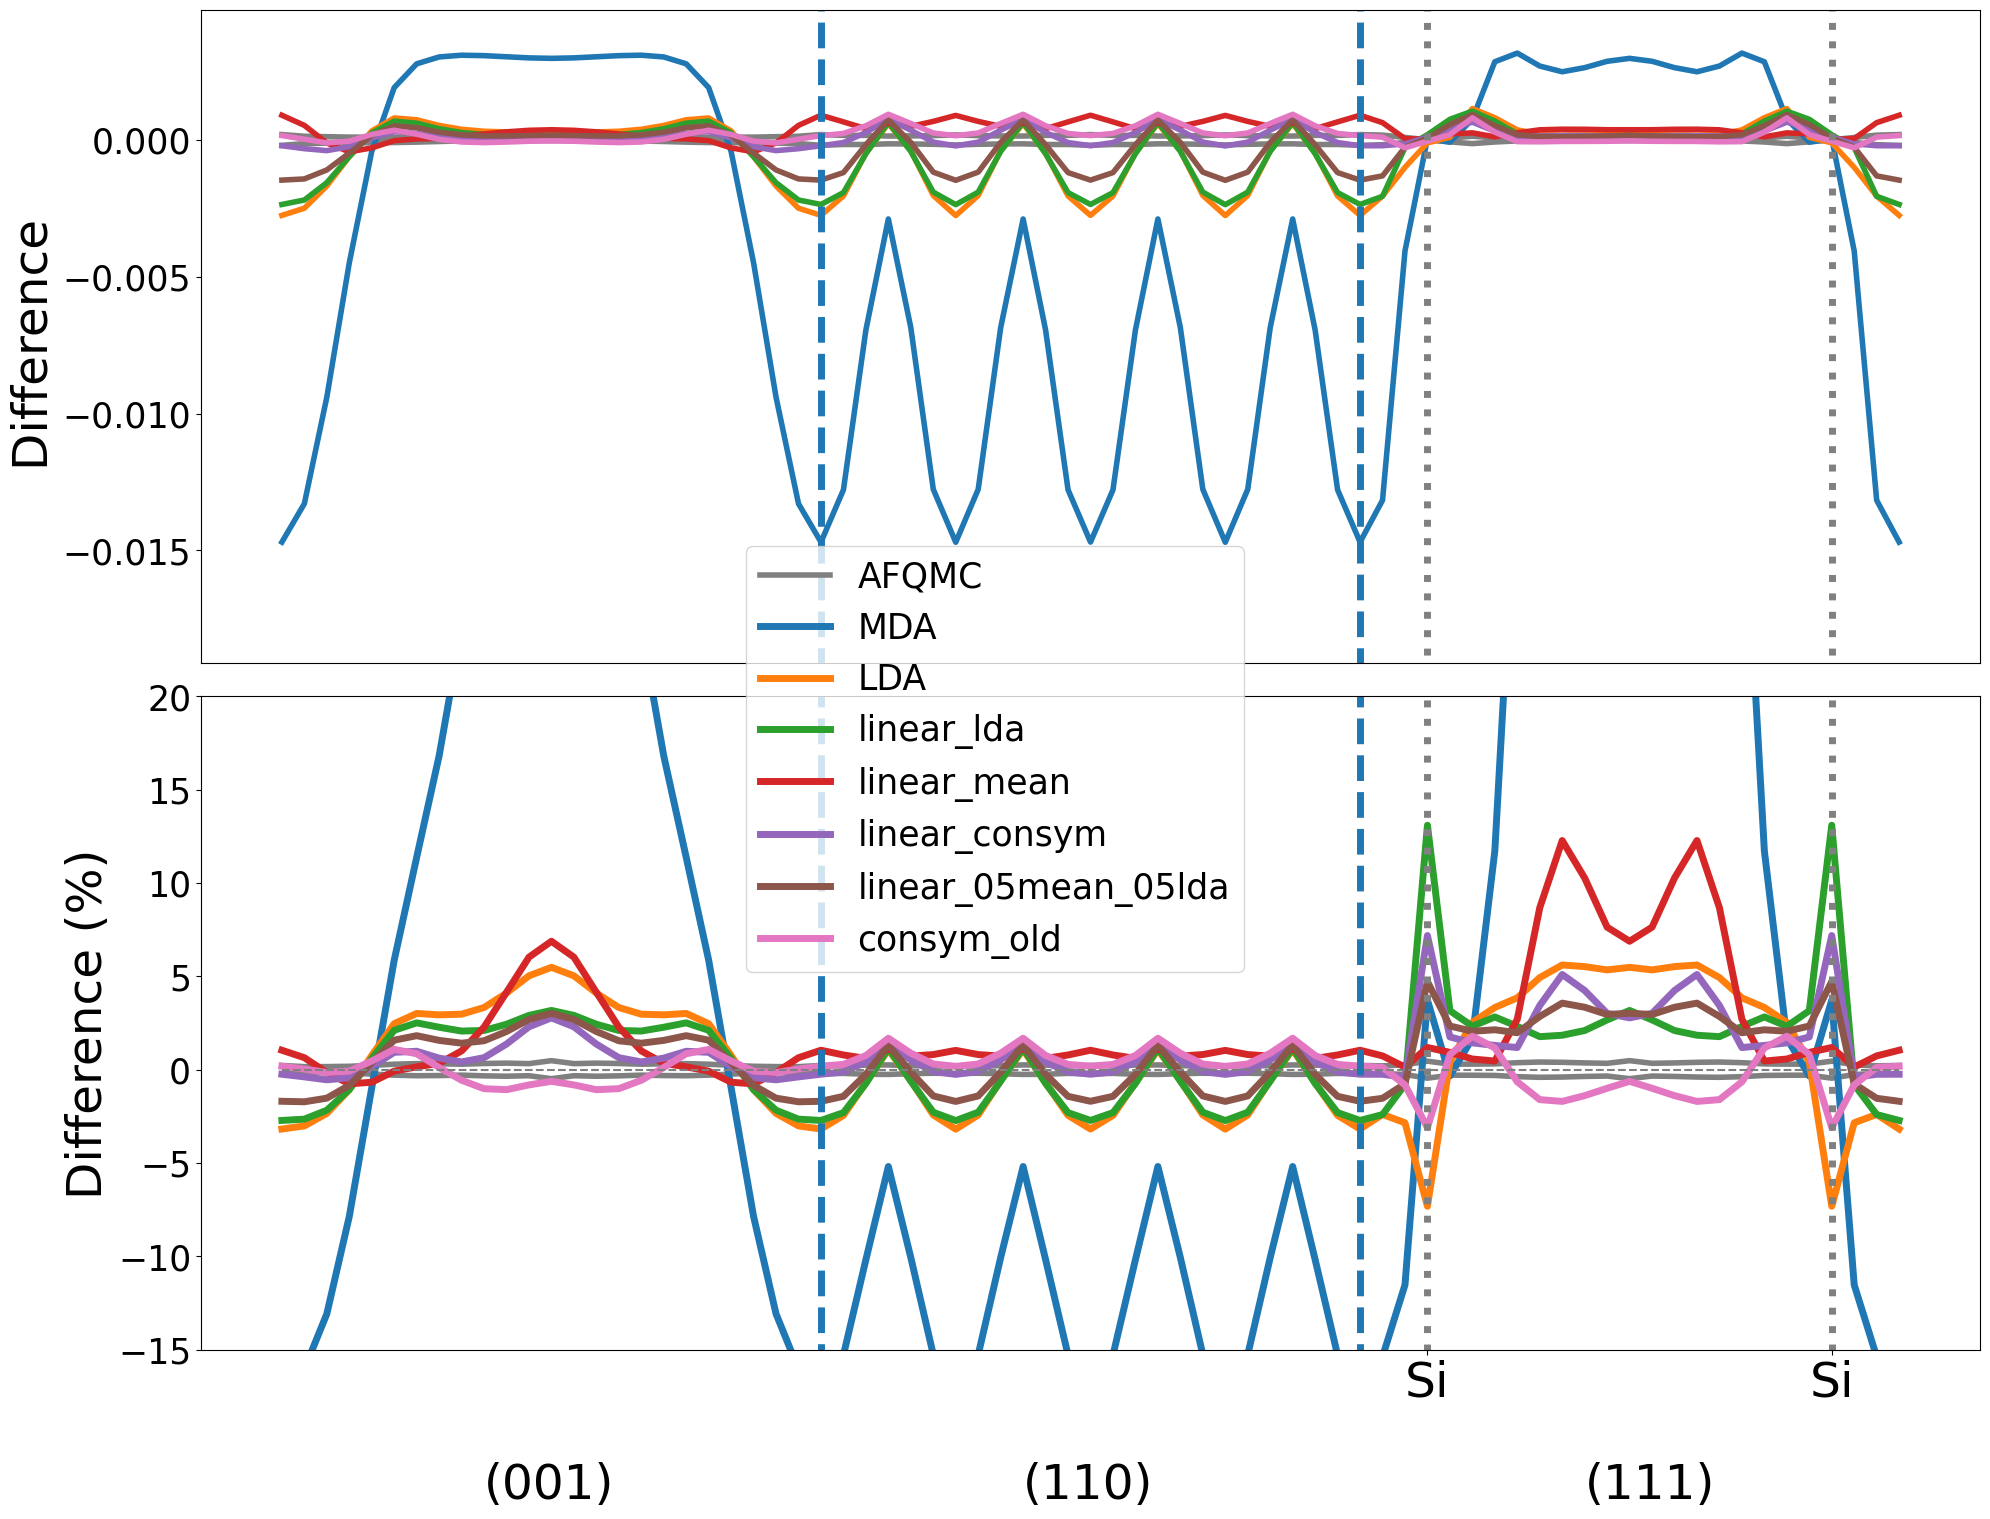

In [45]:
diff_approx, diff_labels=[],[]
for e in approx_dict_si: 
    print(e)
    diff_approx.append(  get_diff_si( approx_dict_si[e][0]) ) 
    diff_labels.append(e)
plot_diff_func(get_dens_inSD_si(newdens_QMC), diff_approx,diff_labels ,erbar) 

/home/ayoub/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


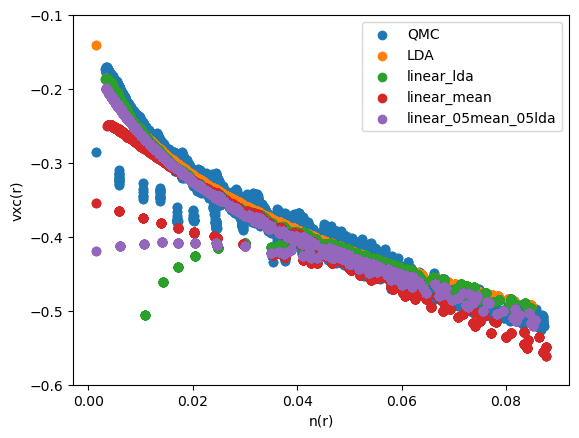

In [37]:
plt.rcdefaults()
plt.scatter(newdens_QMC,vxc_qmc, label="QMC")
for e in approx_dict_si:
    if approx_dict_si[e][1] is not None and e != "consym_old": 
        plt.scatter(approx_dict_si[e][0], approx_dict_si[e][1], label=e)
plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.ylim(-0.6,-0.1)
plt.legend()

In [93]:
#dens_linmean_new,vxc_linmean_new,direct_gap,_,_,_=get_data_from_npz("si_linear_mean.npz", get_vars=1, it=-1)
#get_data_from_npz("si_linear_lda.npz", get_vars=0, it=-1)
#dens_lincon_new,vxc_conmean_new,direct_gap,_,_,_=get_data_from_npz("si_con_mean.npz", get_vars=1, it=-1)
#get_data_from_npz("si_con_lda.npz", get_vars=0, it=-1)

## Direct gap 

In [92]:
si_direct_gaps_data = pd.DataFrame()
si_direct_gaps_data["approx"] = ["QMC", "linear_mean", "linear_lda","linear_0.5mean_0.5lda",
                                 "con_mean", "con_lda","connector sym with corrected prefactor",
                                 "connector sym old"] 
si_direct_gaps_data[" Direct KS Gap (ev)"]= [2.72,2.80,2.59,2.62, 2.54,2.59,2.64,2.71]

si_direct_gaps_data["Relative error (%)"] = 100*(si_direct_gaps_data[" Direct KS Gap (ev)"]-2.72)/2.72
si_direct_gaps_data

,approx,Direct KS Gap (ev),Relative error (%)
0,QMC,2.72,0.000000
1,linear_mean,2.80,2.941176
2,linear_lda,2.59,-4.779412
3,linear_0.5mean_0.5lda,2.62,-3.676471
4,con_mean,2.54,-6.617647
5,con_lda,2.59,-4.779412
6,connector sym with corrected prefactor,2.64,-2.941176
7,connector sym old,2.71,-0.367647


# NaCl 

In [116]:
from plot_diff_nacl import * 
nacl_data=pd.read_csv("nacl_qmc.csv")


In [117]:
nacl_QMC_prim=np.genfromtxt('NaCl_AFQMC+corr+symavgciVeryNew_fft', skip_footer=0)
erbar_nacl=nacl_QMC_prim[:,-1]

In [118]:
def get_data_from_npz_nacl(npz_file, it=-1,skip_band=0): 
    hold= np.load(npz_file)
    num_iter=len(hold["dens_history"])

    dens=hold["dens_history"][it]
    vxc=hold["potxc_history"][it]
    if not skip_band:
        bands=hold["bands_history"][it]
        residu= hold["diff_l"].real
        direct_gap=(bands[0,8]-bands[0,7]) * 27.211
        gap=np.min( np.abs(bands[:,8]-bands[0,7]) ) * 27.211
        print("============")
        print("number of iterations is ", num_iter)
        print("diff on density for the last iteration: {:.2e}".format(residu[it]))
        print("The direct gap is {:.4f} ev | QMC = 5.25 ev".format(direct_gap))
        #print("The gap is {:.4f} for this k-grid ev| QMC = 0.82 ev".format(gap))    
        print("============")
        return dens, vxc, direct_gap, gap, residu, bands 
    return dens , vxc 


In [119]:
newdens_QMC_nacl = nacl_data["dens"].to_numpy()
vxc_qmc_nacl=nacl_data["vxc_corr_shift"].to_numpy()
##
nacl_QMC_prim=np.genfromtxt('NaCl_AFQMC+corr+symavgciVeryNew_fft', skip_footer=0)
newerbar_QMC_nacl=nacl_QMC_prim[:,-1]
##
erbar_nacl= get_dens_inSD_nacl(newerbar_QMC_nacl)

## Connector 

number of iterations is  11
diff on density for the last iteration: 4.65e-07
The direct gap is 4.5336 ev | QMC = 5.25 ev


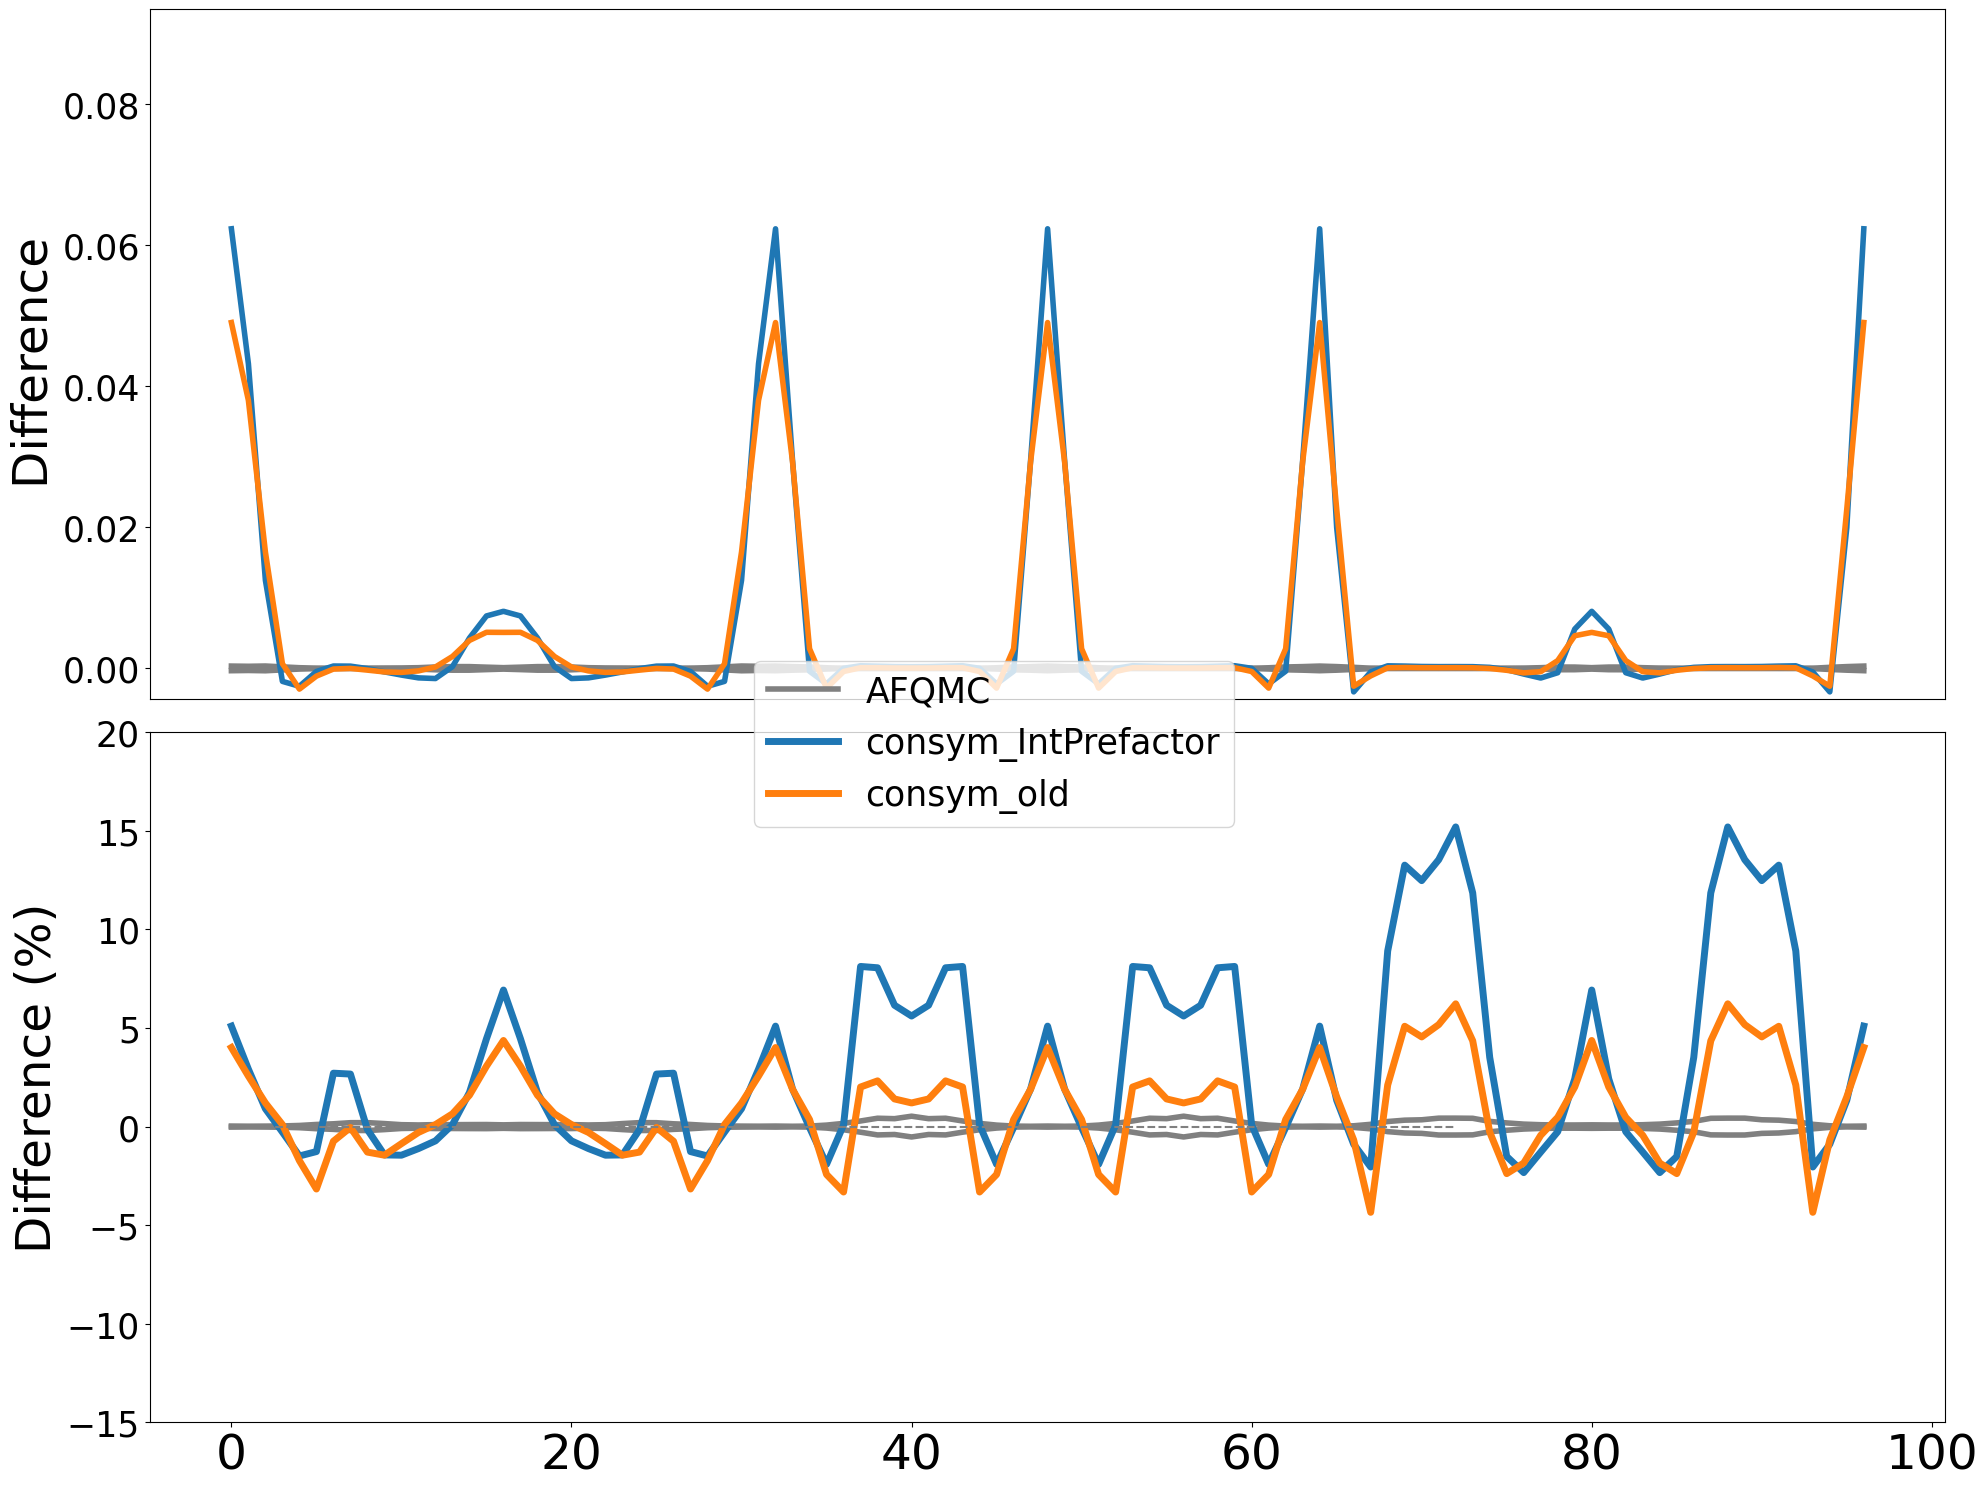

In [120]:
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz_nacl("nacl_IntPrefactorcon_consym.npz", it=-1)
dens_con2,vxc_con2= get_data_from_npz_nacl("nacl_con05ncnr.npz", skip_band=1)
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_IntPrefactor_con_consym.npz")
#dens_con2,vxc_con2,_,_,_,_= get_data_from_npz("si_newPrefOldconsym_consym.npz")

diff_con1= get_dens_inSD_nacl(dens_con1-newdens_QMC_nacl) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_nacl(dens_con2)-get_dens_inSD_nacl(newdens_QMC_nacl) 

diff_approx= [diff_con1, diff_con2] 
plot_diff_func(get_dens_inSD_nacl(newdens_QMC_nacl), diff_approx, ["consym_IntPrefactor","consym_old"],erbar_nacl, mat="nacl") 

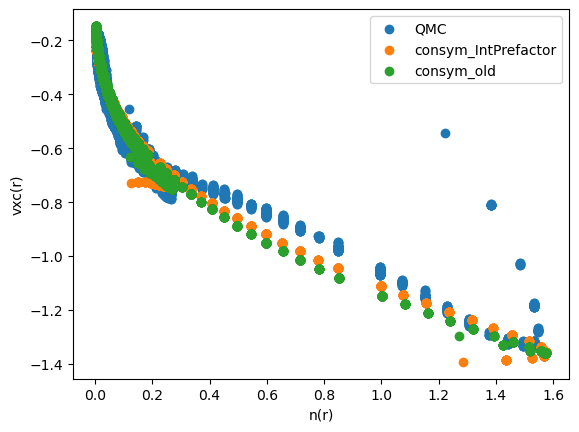

In [121]:
plt.rcdefaults()
plt.scatter(newdens_QMC_nacl,vxc_qmc_nacl, label="QMC")
plt.scatter(dens_con1, vxc_con1, label="consym_IntPrefactor")
plt.scatter(dens_con2, vxc_con2, label="consym_old")
plt.xlabel("n(r)")
plt.ylabel("vxc(r)")
plt.legend()

## Linear approximation 

In [44]:
np.load("dens_history_LinSym_nacl.npz").files

['dens_history']

connector sym with corrected prefactor
number of iterations is  11
diff on density for the last iteration: 4.65e-07
The direct gap is 4.5336 ev | QMC = 5.25 ev
number of iterations is  15
diff on density for the last iteration: 5.58e-08
The direct gap is 4.2665 ev | QMC = 5.25 ev
number of iterations is  15
diff on density for the last iteration: 7.81e-08
The direct gap is 4.5600 ev | QMC = 5.25 ev


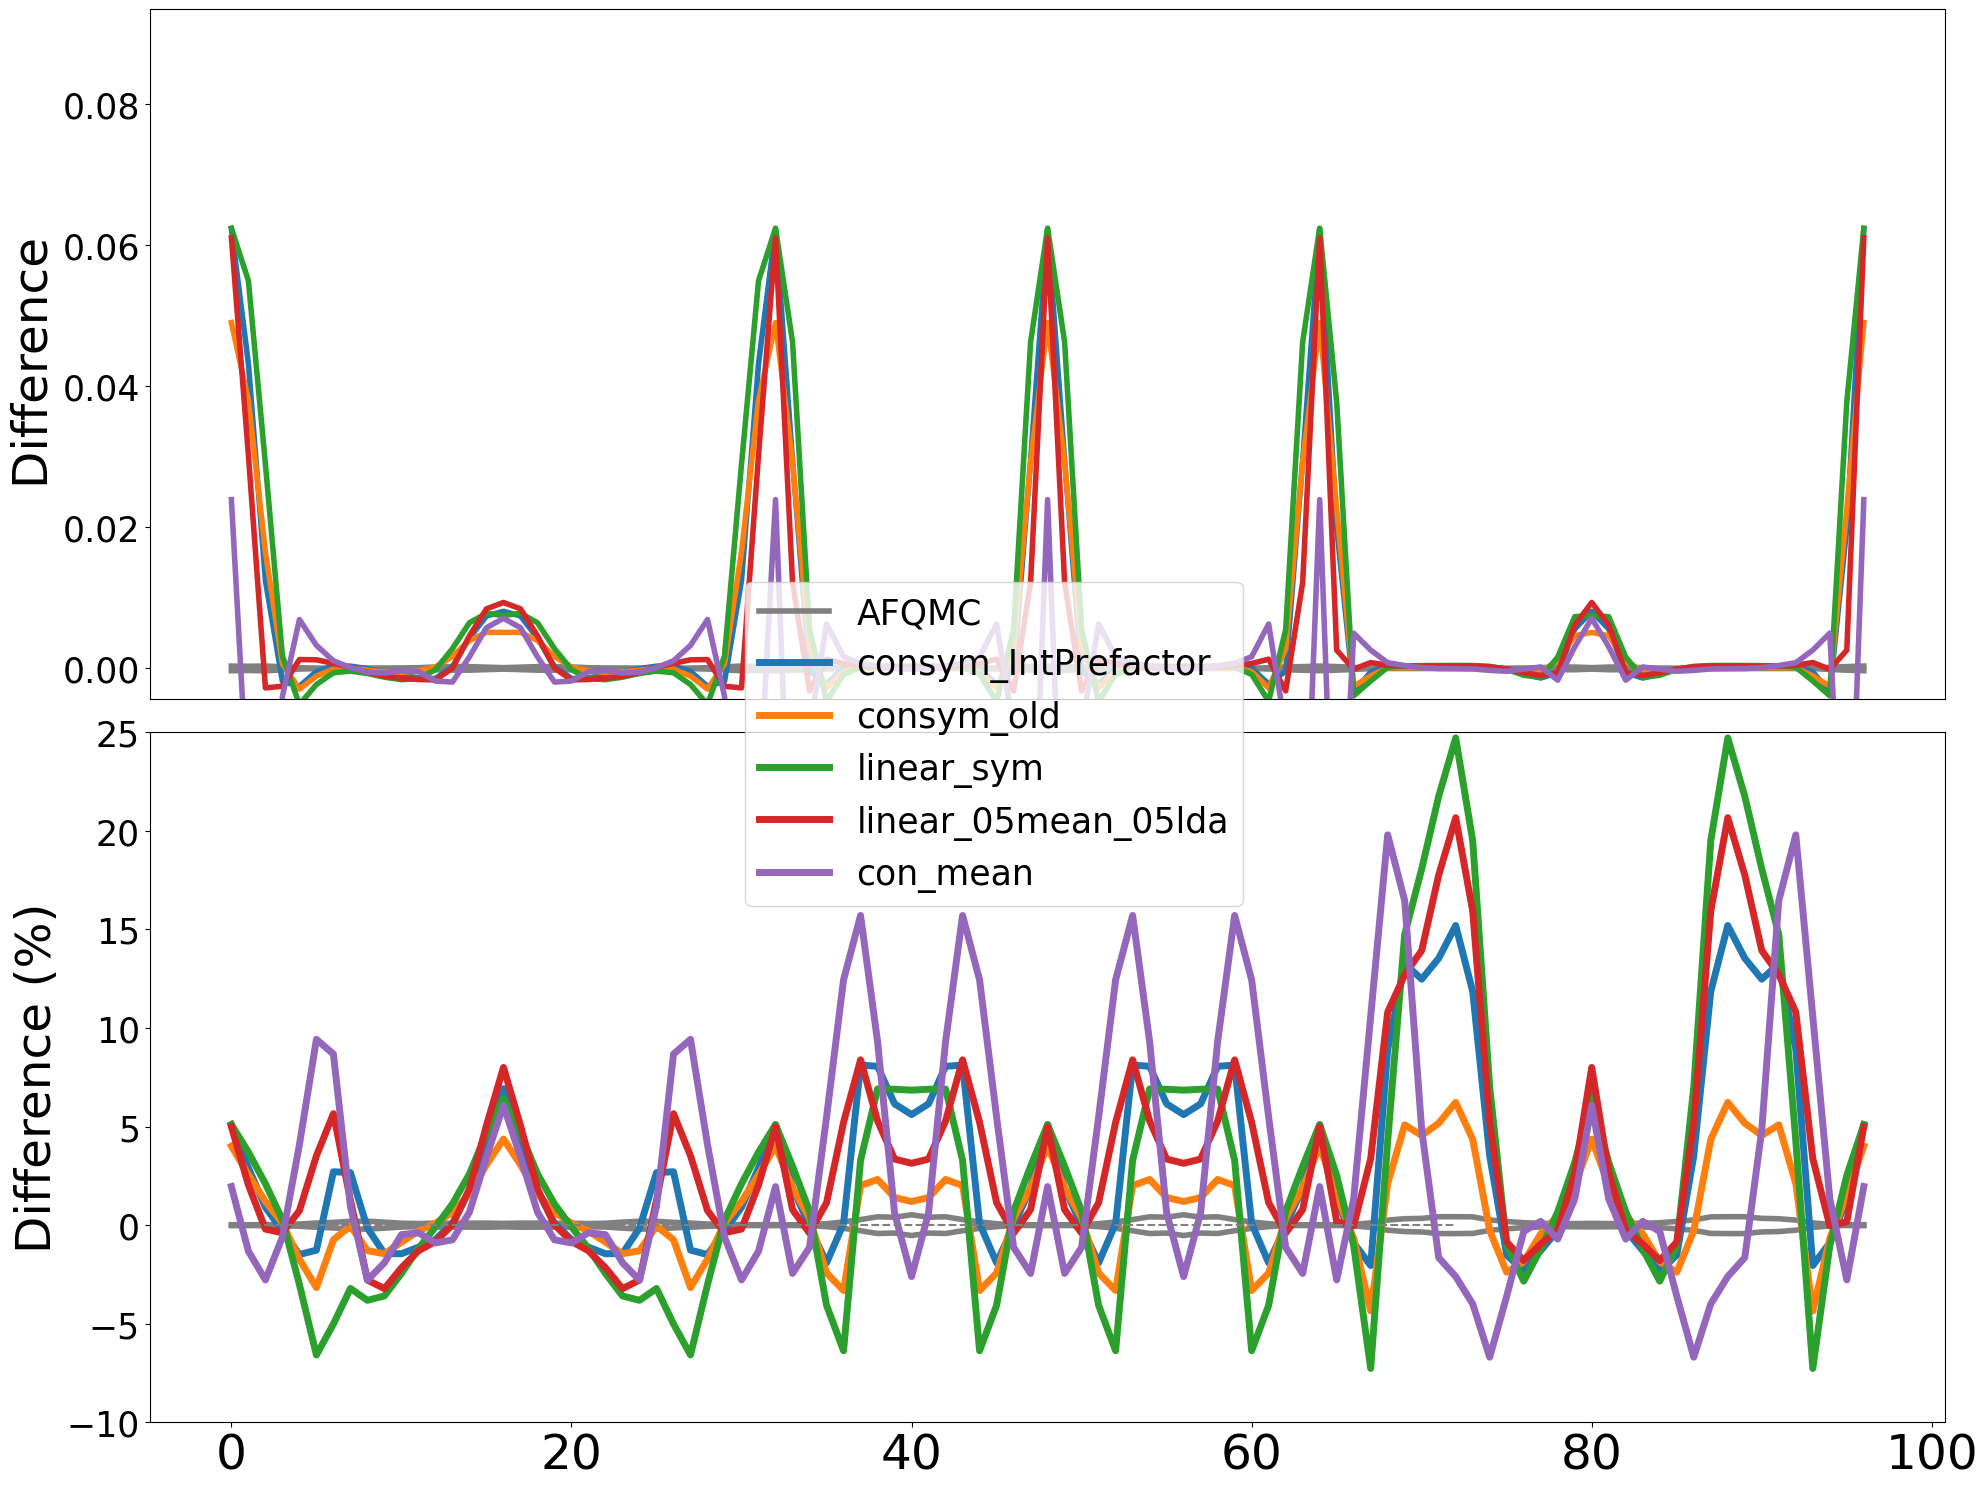

In [125]:
print("connector sym with corrected prefactor")
dens_con1,vxc_con1,_,_,_,_= get_data_from_npz_nacl("nacl_IntPrefactorcon_consym.npz")
dens_con2,vxc_con2= get_data_from_npz_nacl("nacl_con05ncnr.npz", skip_band=1)
dens_con3= np.load("dens_history_LinSym_nacl.npz")["dens_history"][-1]
dens_con4,vxc_con4,_,_,_,_= get_data_from_npz_nacl("nacl_linear_meanlda.npz", skip_band=0)
dens_con5,vxc_con5,_,_,_,_= get_data_from_npz_nacl("nacl_con_mean.npz", skip_band=0)


diff_con1= get_dens_inSD_nacl(dens_con1-newdens_QMC_nacl) 
#diff_consym_old=get_dens_inSD(dens_con2-newdens_QMC)
diff_con2= get_dens_inSD_nacl(dens_con2)-get_dens_inSD_nacl(newdens_QMC_nacl) 
diff_con3= get_dens_inSD_nacl(dens_con3)-get_dens_inSD_nacl(newdens_QMC_nacl) 
diff_con4= get_dens_inSD_nacl(dens_con4)-get_dens_inSD_nacl(newdens_QMC_nacl) 
diff_con5= get_dens_inSD_nacl(dens_con5)-get_dens_inSD_nacl(newdens_QMC_nacl) 


diff_approx= [diff_con1, diff_con2,diff_con3, diff_con4,diff_con5] 
plot_diff_func(get_dens_inSD_nacl(newdens_QMC_nacl), diff_approx, ["consym_IntPrefactor","consym_old"
                        ,"linear_sym", "linear_05mean_05lda","con_mean"]
               ,erbar_nacl, mat="nacl",
              ymin=-10, ymax=25) 

## Direct Gap 

In [127]:
#_,_,_,_,_,_=get_data_from_npz_nacl("nacl_linear_mean.npz", it=-1)

#_,_,_,_,_,_=get_data_from_npz_nacl("nacl_linear_lda.npz", it=-1)

#_,_,_,_,_,_=get_data_from_npz_nacl("nacl_con_mean.npz", it=-1)

#dens_lincon_new,vxc_conmean_new,direct_gap,_,_,_=get_data_from_npz_nacl("nacl_con_lda.npz", it=-1)

_,_,_,_,_,_=get_data_from_npz_nacl("nacl_con_lda.npz", it=-1)
_,_,_,_,_,_=get_data_from_npz_nacl("nacl_consym.npz", it=-1)


number of iterations is  2
diff on density for the last iteration: 1.40e-03
The direct gap is 3.8399 ev | QMC = 5.25 ev
number of iterations is  2
diff on density for the last iteration: 5.40e-03
The direct gap is 5.1704 ev | QMC = 5.25 ev


In [129]:
nacl_direct_gaps_data = pd.DataFrame()
nacl_direct_gaps_data["approx"] = ["QMC", "linear_mean", "linear_lda","linear_0.5mean_0.5lda",
                                 "con_mean", "con_lda","connector sym with corrected prefactor",
                                 "connector sym old"] 
nacl_direct_gaps_data[" Direct KS Gap (ev)"]= [5.25,3.59,3.33,4.26, 4.56,3.83,4.53,4.87]

nacl_direct_gaps_data["Relative error (%)"] = 100*(nacl_direct_gaps_data[" Direct KS Gap (ev)"]-nacl_direct_gaps_data[" Direct KS Gap (ev)"][0])/nacl_direct_gaps_data[" Direct KS Gap (ev)"][0]
nacl_direct_gaps_data

,approx,Direct KS Gap (ev),Relative error (%)
0,QMC,5.25,0.000000
1,linear_mean,3.59,-31.619048
2,linear_lda,3.33,-36.571429
3,linear_0.5mean_0.5lda,4.26,-18.857143
4,con_mean,4.56,-13.142857
5,con_lda,3.83,-27.047619
6,connector sym with corrected prefactor,4.53,-13.714286
7,connector sym old,4.87,-7.238095
